## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
# Dropout_EXP = 0.25
Dropout_EXP = [0.1, 0.3, 0.5, 0.7, 0.9]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for droprate in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=droprate)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)#, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    exp_name_tag = "exp-droprate-%.4f-" % (droprate)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0   

Epoch 46/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.1572 - accuracy: 0.5810 - val_loss: 1.3386 - val_accuracy: 0.5309
Epoch 47/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.1556 - accuracy: 0.5832 - val_loss: 1.3322 - val_accuracy: 0.5317
Epoch 48/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.1432 - accuracy: 0.5848 - val_loss: 1.3365 - val_accuracy: 0.5322
Epoch 49/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.1389 - accuracy: 0.5896 - val_loss: 1.3383 - val_accuracy: 0.5275
Epoch 50/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.1402 - accuracy: 0.5892 - val_loss: 1.3485 - val_accuracy: 0.5292
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
___________________________________

Epoch 41/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.6009 - accuracy: 0.4265 - val_loss: 1.5664 - val_accuracy: 0.4520
Epoch 42/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.5971 - accuracy: 0.4252 - val_loss: 1.5817 - val_accuracy: 0.4465
Epoch 43/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.6041 - accuracy: 0.4219 - val_loss: 1.5422 - val_accuracy: 0.4468
Epoch 44/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.6017 - accuracy: 0.4208 - val_loss: 1.5453 - val_accuracy: 0.4597
Epoch 45/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.5947 - accuracy: 0.4270 - val_loss: 1.5181 - val_accuracy: 0.4647
Epoch 46/50
50000/50000 [==============================] - 10s 210us/step - loss: 1.5934 - accuracy: 0.4296 - val_loss: 1.5568 - val_accuracy: 0.4590
Epoch 47/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.5876 - accuracy:

Epoch 36/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.9623 - accuracy: 0.2535 - val_loss: 2.0313 - val_accuracy: 0.2528
Epoch 37/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.9571 - accuracy: 0.2602 - val_loss: 2.0400 - val_accuracy: 0.2666
Epoch 38/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.9610 - accuracy: 0.2582 - val_loss: 2.0350 - val_accuracy: 0.2523
Epoch 39/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.9508 - accuracy: 0.2629 - val_loss: 2.0309 - val_accuracy: 0.2703
Epoch 40/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.9523 - accuracy: 0.2632 - val_loss: 2.0211 - val_accuracy: 0.2738
Epoch 41/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.9522 - accuracy: 0.2643 - val_loss: 1.9923 - val_accuracy: 0.2755
Epoch 42/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.9493 - accuracy:

Epoch 28/50
50000/50000 [==============================] - 11s 217us/step - loss: 2.3027 - accuracy: 0.0965 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 29/50
50000/50000 [==============================] - 11s 218us/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 30/50
50000/50000 [==============================] - 11s 217us/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 31/50
50000/50000 [==============================] - 11s 214us/step - loss: 2.3027 - accuracy: 0.0965 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 32/50
50000/50000 [==============================] - 11s 218us/step - loss: 2.3027 - accuracy: 0.0966 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 33/50
50000/50000 [==============================] - 11s 217us/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 34/50
50000/50000 [==============================] - 11s 217us/step - loss: 2.3027 - accuracy:

Epoch 21/50
50000/50000 [==============================] - 11s 212us/step - loss: 2.3027 - accuracy: 0.0960 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 22/50
50000/50000 [==============================] - 11s 218us/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 23/50
50000/50000 [==============================] - 11s 213us/step - loss: 2.3026 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 24/50
50000/50000 [==============================] - 11s 212us/step - loss: 2.3026 - accuracy: 0.0965 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 25/50
50000/50000 [==============================] - 11s 212us/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 26/50
50000/50000 [==============================] - 11s 213us/step - loss: 2.3027 - accuracy: 0.0966 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 27/50
50000/50000 [==============================] - 11s 215us/step - loss: 2.3027 - accuracy:

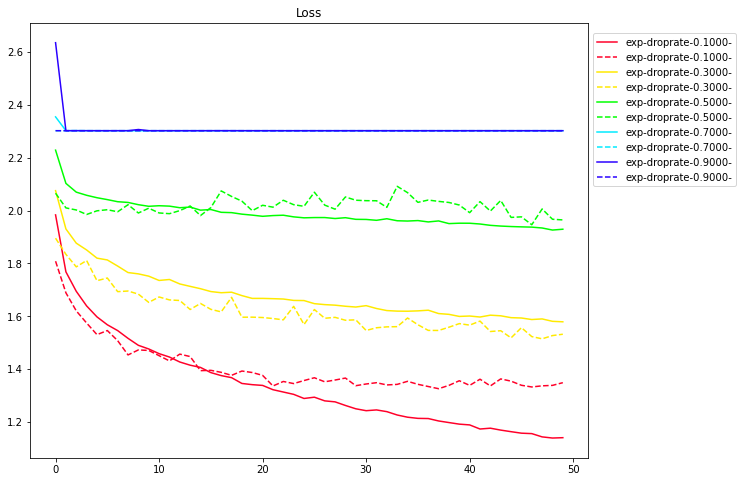

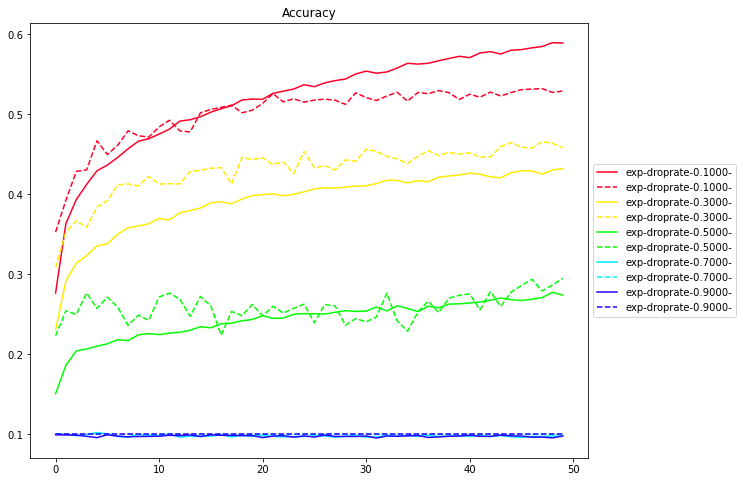

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(10,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()

plt.figure(figsize=(10,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()